In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"] = 12

# 载入波士顿房价数据集
boston = load_boston()

# 获取房源数据与目标值（房价）
X , y = boston.data, boston.target

# 将房源数据X与目标值y拼接，便于整体上显示数据。
df = pd.DataFrame(np.concatenate([X, y.reshape(-1, 1)], axis=1), 
                  columns=boston.feature_names.tolist() + ["MEDV"])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
from sklearn.model_selection import train_test_split

# 仅使用RM（平均房间数）一个特征，实现简单线性回归
x, y = df["RM"], df["MEDV"]

# 将数据集划分为训练集与测试集，返回切分之后的数据
# test_size：测试集大小
# random_state：随机种子，可用来产生相同的随机数序列
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [3]:
# 计算w1的分子部分。
numerator = np.sum((x_train - x_train.mean()) * (y_train - y_train.mean()))

# 计算w1的分母部分。
denominator = np.sum((x_train - x_train.mean()) ** 2)
w1 = numerator / denominator
w0 = y_train.mean() - w1 * x_train.mean()
print(w1)
print(w0)

9.312949225629247
-36.18099264633921


In [4]:
y_hat = x_test * w1 + w0
print(y_hat.iloc[:10])

329    22.797915
371    21.708300
219    23.170433
403    13.633973
78     21.857307
15     18.150753
487    18.811973
340    19.398688
310    10.132304
102    23.468447
Name: RM, dtype: float64


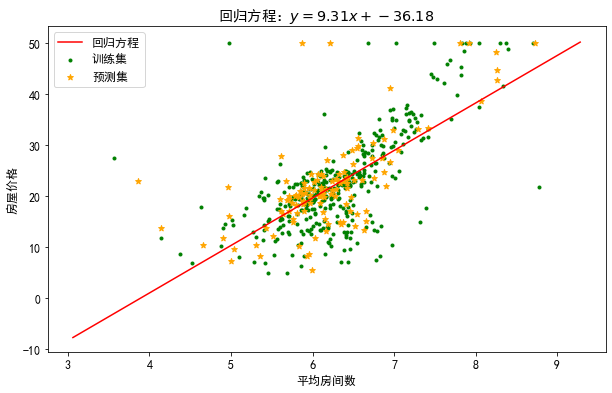

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, c="g", marker=".", label="训练集")
plt.scatter(x_test, y_test, c="orange", marker="*", label="预测集")
# 让回归方程x的区间比数据集中x的区间大一些。
t = np.linspace(x_train.min() - 0.5, x_train.max() + 0.5, 100)
t2 = t * w1 + w0
plt.plot(t, t2, "r-", label="回归方程")
plt.legend()
plt.xlabel("平均房间数")
plt.ylabel("房屋价格")
plt.title(f"回归方程：$y = {w1:.2f}x + {w0:.2f}$")
plt.show()

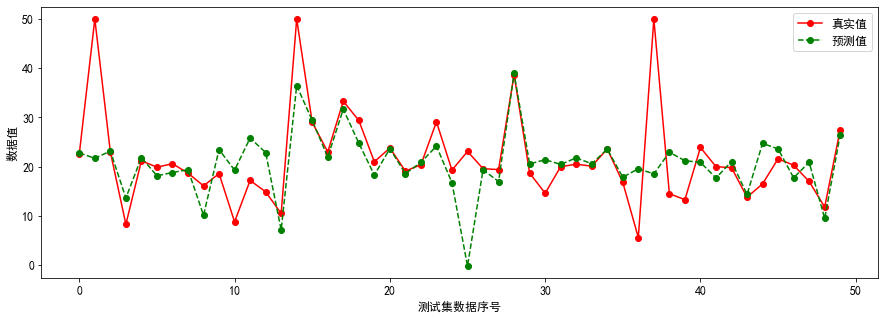

In [6]:
num = 50
plt.figure(figsize=(15, 5))
index = np.arange(num)
plt.plot(index, y_test.iloc[:50], label="真实值", color="r", marker="o")
plt.plot(index, y_hat.iloc[:50], label="预测值", ls="--", color="g", marker="o")
plt.xlabel("测试集数据序号")
plt.ylabel("数据值")
plt.legend()

In [7]:
from sklearn.linear_model import LinearRegression

# 创建线性回归类的对象。
lr = LinearRegression()

# 我们提供数据（x）与数据对应的标签（y），fit方法用来训练（拟合）模型，求解参数。
# 需要注意，在fit方法中，x要求为二维数组类型。
X_train = x_train.values.reshape(-1, 1)
X_test = x_test.values.reshape(-1, 1)
lr.fit(X_train, y_train)

# 当训练模型后，就可以获取参数，即w1与w0。
print("权重：", lr.coef_)
print("偏置：", lr.intercept_)
y_hat = lr.predict(X_test)
print(y_hat[:10])

权重： [9.31294923]
偏置： -36.180992646339206
[22.7979148  21.70829974 23.17043277 13.63397276 21.85730693 18.15075314
 18.81197253 19.39868833 10.13230385 23.46844714]
